In [1]:
#Import Packages
import pandas as pd
import numpy as np
from Schedule.Schedule import Schedule
from Schedule.Stats import Stats
from Regression.ELO import ELO
from Regression.Game_Scores_v2 import Game_Scores
%matplotlib inline  

//anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
#Get schedule of games
sched_2014 = Schedule(b_dt = '10/1/2014')
sched_2015 = Schedule(b_dt = '10/1/2015')

In [3]:
# Create master list of games
games = sched_2014.get_games().append(sched_2015.get_games()).reset_index(drop=True)

In [4]:
# Creates elo scores
elo = ELO(games, 'GAME_DATE', 'Home Team', 'Away Team', 'H_PTS', 'A_PTS')
elo_data = elo.create_elo(1500, 20, 100, '538')

In [5]:
# Joins ELO data back to games
for index, game in games.iterrows():
    game_dt = game['GAME_DATE']
    poss_elo = elo_data[elo_data.index < game_dt]
    
    h_team = game['Home Team']
    if len(poss_elo) == 0:
        h_elo_score = 1500
    else:
        h_elo_score = poss_elo.tail(1)[h_team][0]
    games.set_value(index, 'H_ELO', h_elo_score)
    
    a_team = game['Away Team']
    if len(poss_elo) == 0:
        a_elo_score = 1500
    else:
        a_elo_score = poss_elo.tail(1)[a_team][0]
    games.set_value(index, 'A_ELO', a_elo_score)

In [6]:
#Filter out early games with little ELO info
print len(games)
games = games.sort_values(by='GAME_DATE').reset_index(drop=True).ix[100:, :]
print len(games)

2460
2360


In [7]:
x = games[['H_ELO', 'A_ELO']]
gs = Game_Scores(games, x, 'Pts_diff')

//anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:545: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


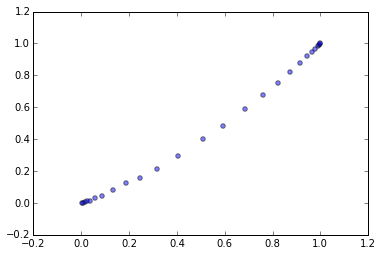

In [8]:
gs.create_rank_order_graph()

In [9]:
gs.get_model().get_mse()

145.33767844967082